In [2]:
# Library import
 
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from pydataxm import *                           #Se realiza la importación de las librerias necesarias para ejecutar                        
from pydataxm.pydataxm import ReadDB as apiXM 
import datetime as dt                            
import pandas as pd
from pathlib import Path
import os

In [3]:
s_path=Path.cwd()
s_prt_path=s_path.parent

In [4]:
objetoAPI = pydataxm.ReadDB()                    #Se almacena el servicio en el nombre objetoAPI

In [5]:
df =objetoAPI.get_collections()

In [6]:
FechaIni=dt.date(2014, 1,1 )
FechaFin=dt.date(2018, 1, 1)

In [8]:
df_Rec= apiXM.request_data(pydataxm.ReadDB(),    #Se indica el objeto que contiene el serivicio
                        "ListadoRecursos",                #Se indica el nombre de la métrica tal como se llama en el campo metricID
                        "Sistema",                 #Campo que indica si es Sistema, Agente, Recurso, Comercializador
                        FechaIni,       #Corresponde a la fecha inicial de la consulta
                        FechaFin)      #Corresponde a la fecha final de la consulta

In [9]:
df_Rec.drop(['Date','Id'],axis=1,inplace=True)
df_Rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632 entries, 0 to 631
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Values_Code           632 non-null    object
 1   Values_Name           632 non-null    object
 2   Values_Type           632 non-null    object
 3   Values_Disp           632 non-null    object
 4   Values_RecType        632 non-null    object
 5   Values_CompanyCode    632 non-null    object
 6   Values_EnerSource     632 non-null    object
 7   Values_OperStartdate  632 non-null    object
 8   Values_State          632 non-null    object
dtypes: object(9)
memory usage: 44.6+ KB


#### Aportes en los caudales de los rios

In [10]:
# Unit kWh
df_Aportes= apiXM.request_data(pydataxm.ReadDB(),    #Se indica el objeto que contiene el serivicio
                        "AporEner",                #Se indica el nombre de la métrica tal como se llama en el campo metricID
                        "Sistema",                 #Campo que indica si es Sistema, Agente, Recurso, Comercializador
                        FechaIni,       #Corresponde a la fecha inicial de la consulta
                        FechaFin)      #Corresponde a la fecha final de la consulta
df_Aportes.rename(columns={'Value':'Aportes'},inplace=True)
df_Aportes.head(5) 

,Id,Aportes,Date
0,Sistema,89094000.0,2014-01-01
1,Sistema,81609800.0,2014-01-02
2,Sistema,99441100.0,2014-01-03
3,Sistema,85628200.0,2014-01-04
4,Sistema,84257000.0,2014-01-05


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

Text(0, 0.5, 'Kwh-día')

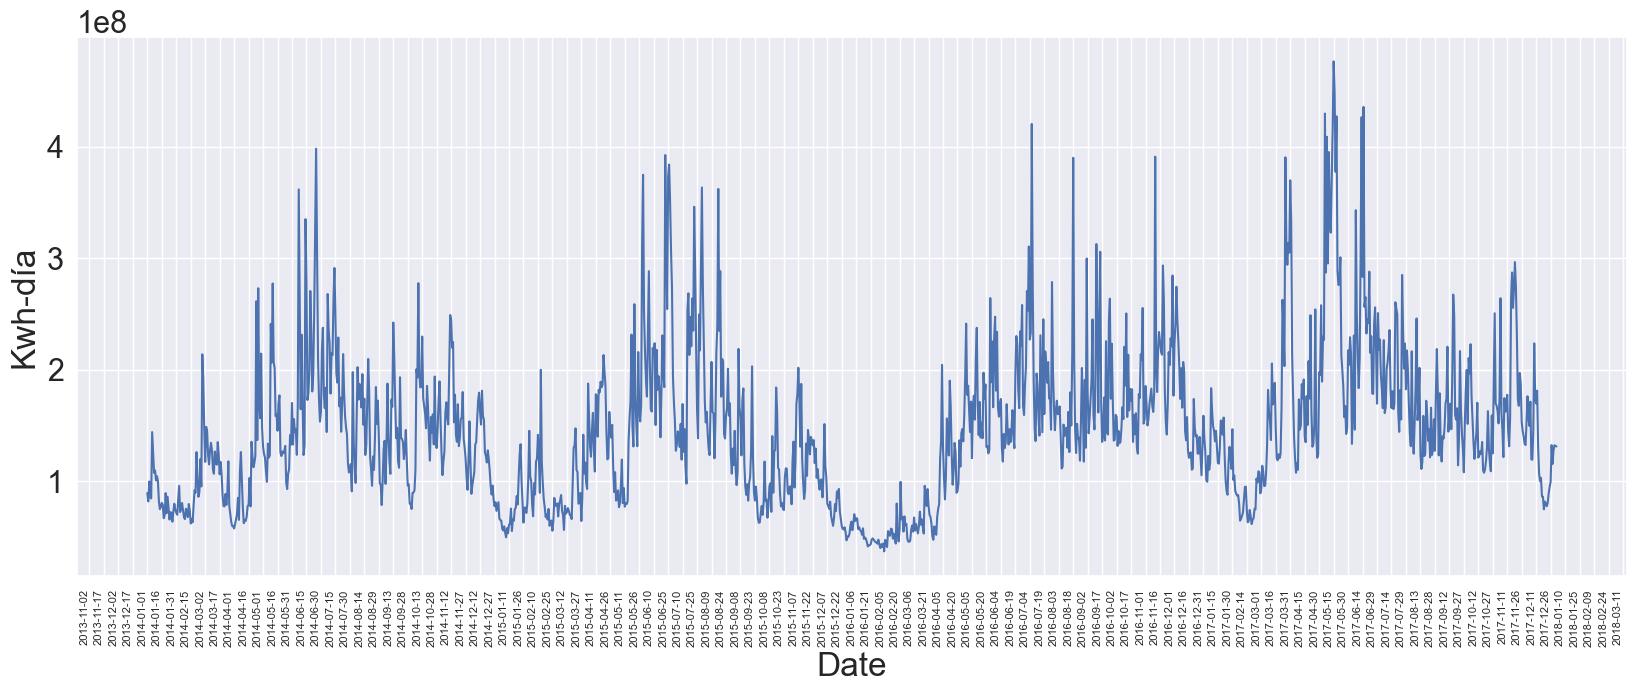

In [24]:

plt.figure(1)
sns.set(rc={'figure.figsize':(20,7)})
sns.set_style("whitegrid")
sns.set(font_scale=2)
ax=sns.lineplot(data = df_Aportes, x='Date', y='Aportes')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=15))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right', fontsize=8)
plt.ylabel('Kwh-día')


In [25]:
df_CEN= apiXM.request_data(pydataxm.ReadDB(),    #Se indica el objeto que contiene el serivicio
                        "CapEfecNeta",                #Se indica el nombre de la métrica tal como se llama en el campo metricID
                        "Recurso",                 #Campo que indica si es Sistema, Agente, Recurso, Comercializador
                        FechaIni,       #Corresponde a la fecha inicial de la consulta
                        FechaFin)  

In [31]:
df_Gen= apiXM.request_data(pydataxm.ReadDB(),    #Se indica el objeto que contiene el serivicio
                        "Gene",                #Se indica el nombre de la métrica tal como se llama en el campo metricID
                        "Recurso",                 #Campo que indica si es Sistema, Agente, Recurso, Comercializador
                        FechaIni,       #Corresponde a la fecha inicial de la consulta
                        FechaFin)      #Corresponde a la fecha final de la consulta


KeyboardInterrupt: 

In [32]:
df_Gen.fillna(0, inplace=True)

In [33]:
df_Gen.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203009 entries, 0 to 3296
Data columns (total 27 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Id             203009 non-null  object        
 1   Values_code    203009 non-null  object        
 2   Values_Hour01  203009 non-null  float64       
 3   Values_Hour02  203009 non-null  float64       
 4   Values_Hour03  203009 non-null  float64       
 5   Values_Hour04  203009 non-null  float64       
 6   Values_Hour05  203009 non-null  float64       
 7   Values_Hour06  203009 non-null  float64       
 8   Values_Hour07  203009 non-null  float64       
 9   Values_Hour08  203009 non-null  float64       
 10  Values_Hour09  203009 non-null  float64       
 11  Values_Hour10  203009 non-null  float64       
 12  Values_Hour11  203009 non-null  float64       
 13  Values_Hour12  203009 non-null  float64       
 14  Values_Hour13  203009 non-null  float64       
 15  Values_

In [30]:
columns_per=list(df_Gen.columns)[2:26]
df_Gen_Type=df_Gen.merge(df_Rec,left_on=['Values_code'],right_on=['Values_Code'], how='left')
df_Data=df_Gen_Type.groupby(['Date', 'Values_code','Values_Name','Values_RecType','Values_Disp','Values_Type'],as_index=False)[columns_per].mean()
df_Data.to_csv('GenReal.csv')